In [4]:
# Implement dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Proprocessing 
from sklearn.model_selection import cross_val_score, train_test_split

dataset=pd.read_csv('airfoil_self_noise.dat',sep="\t",engine='python',
    names=["Frequency","Angle","Chord","Velocity","Suction","Pressure Level"],header=None)

X=dataset.drop("Pressure Level",axis=1)
y=dataset["Pressure Level"]

dataset.corr()
X_train,X_test,y_train,y_test=train_test_split(X,y)

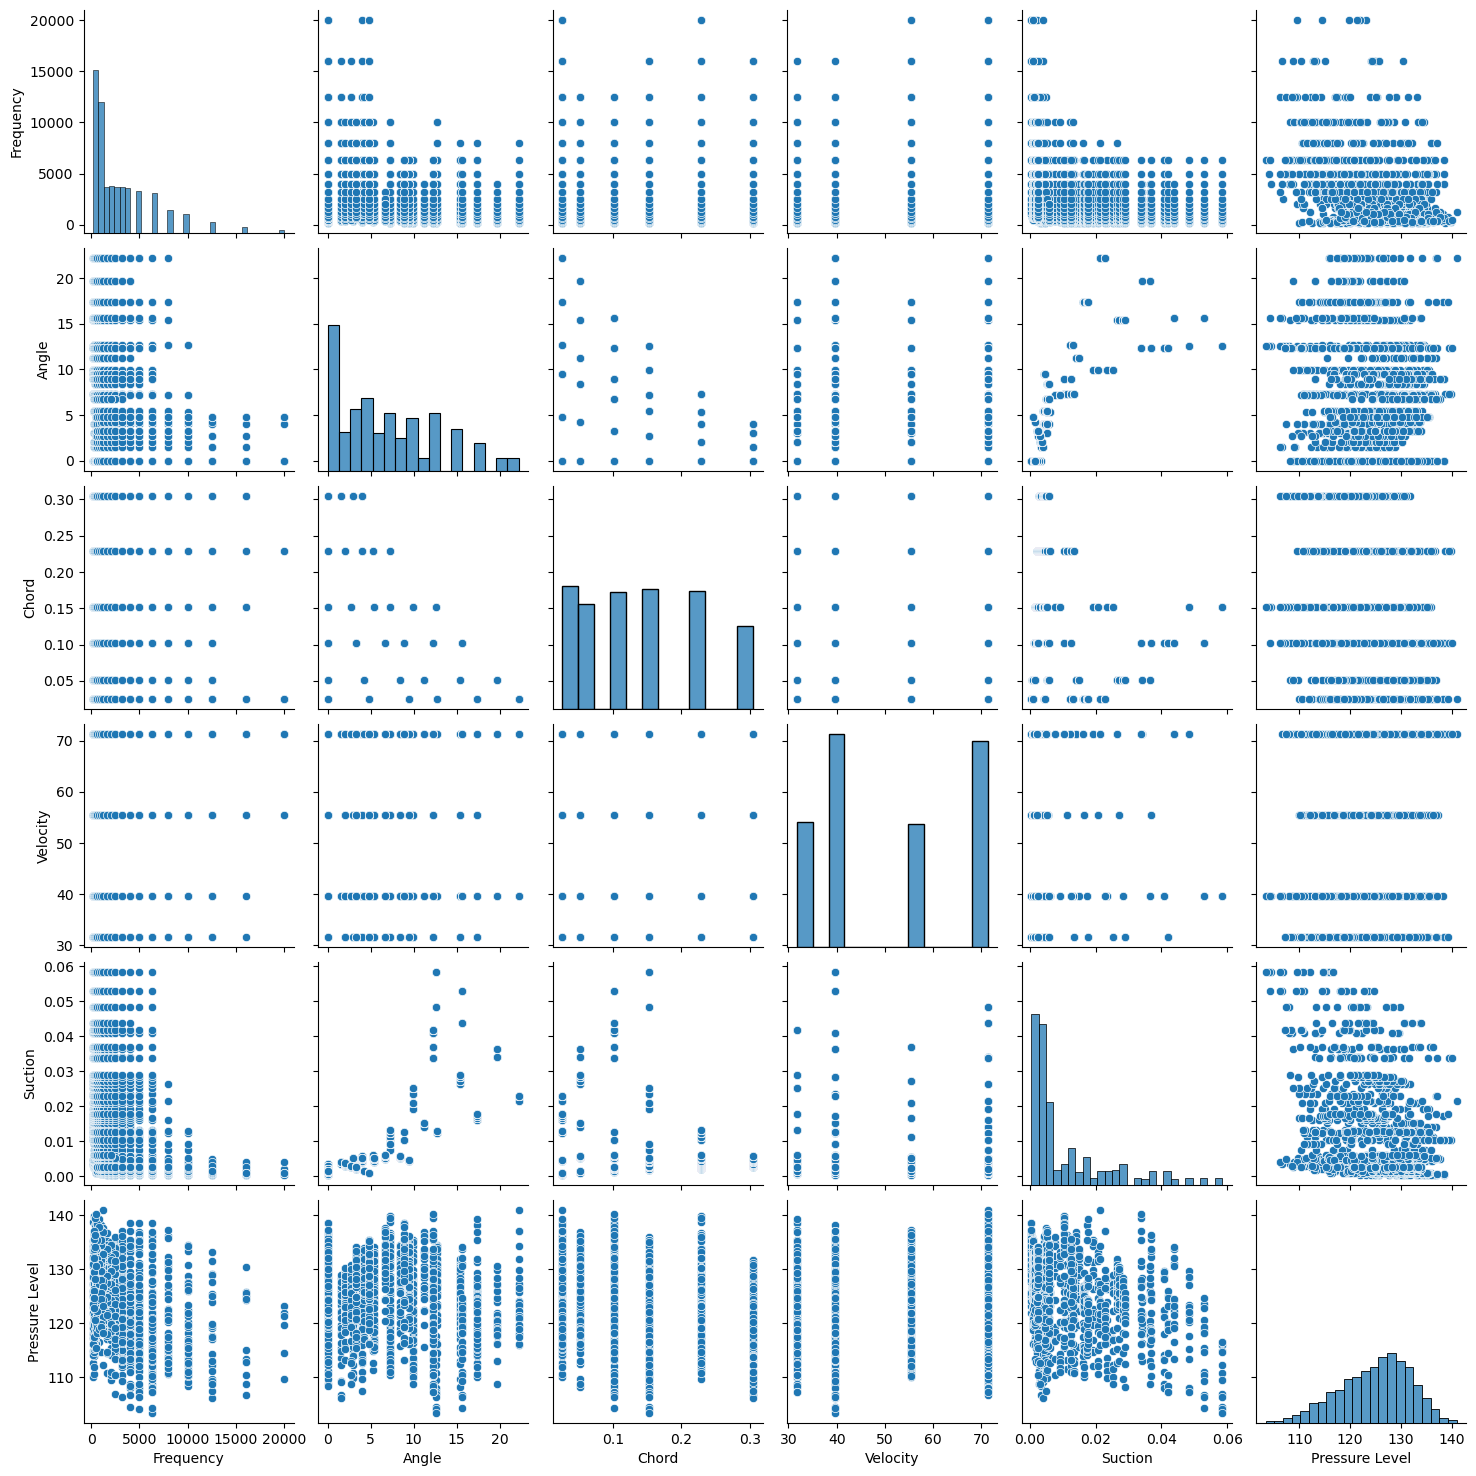

In [7]:
# Pairplot
sns.pairplot(dataset)

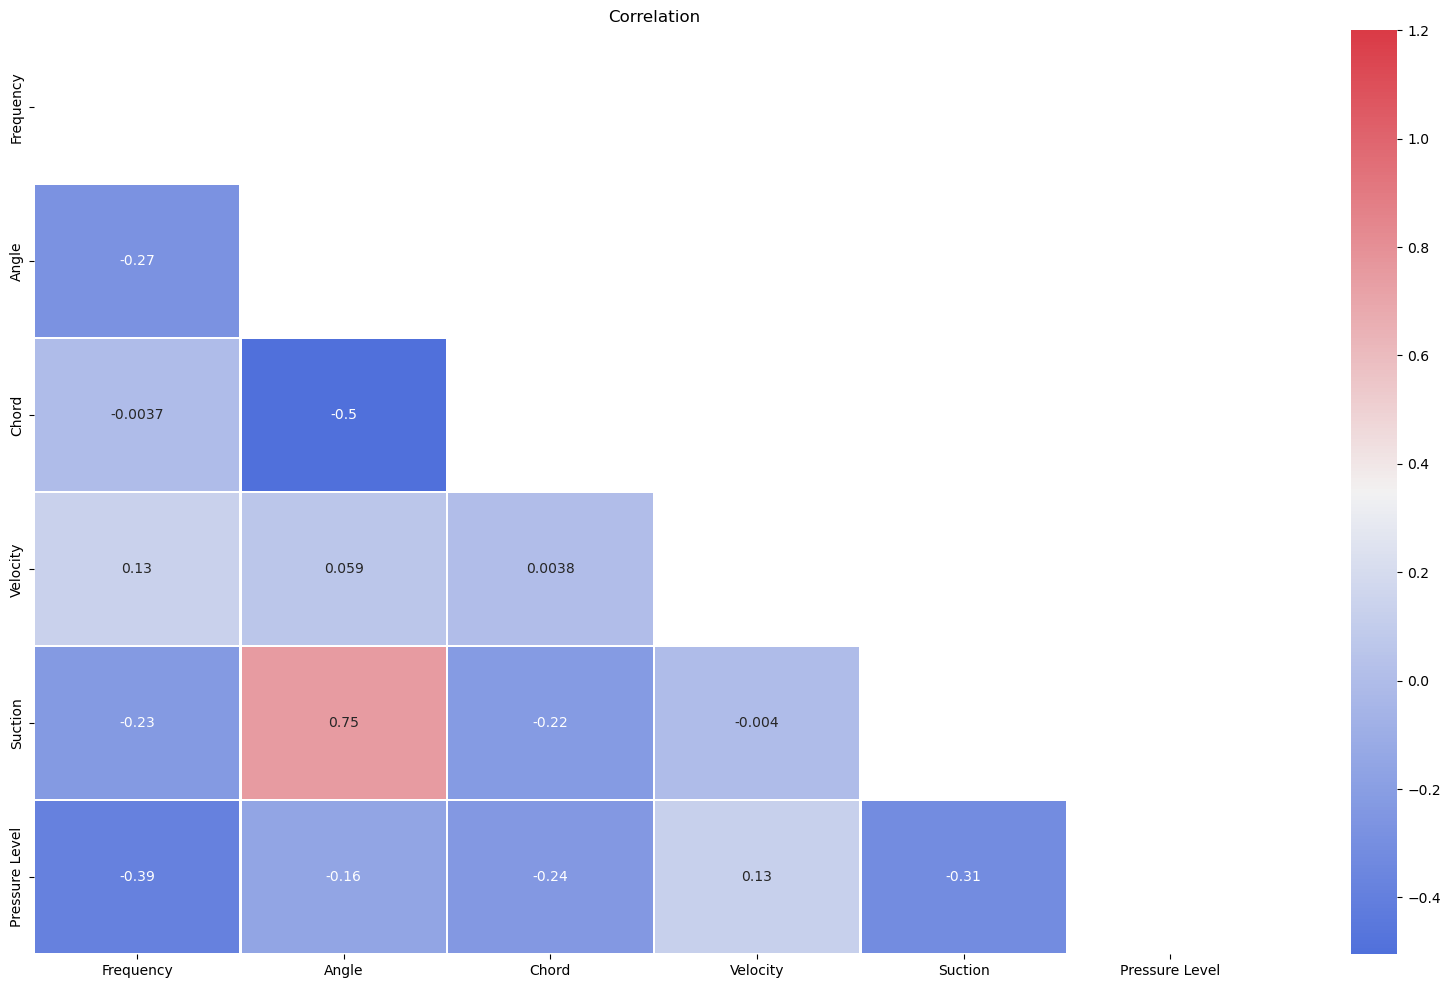

In [9]:
# Correlation Matrix
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [3]:
# Normalization
from sklearn.preprocessing import Normalizer
normal=Normalizer()
Xn_train=normal.fit_transform(X_train)
Xn_test=normal.transform(X_test)

In [4]:
# Feature selection, k = 3 means the number of features will decrease to 3
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif,k=3)  #the reason why use f_classif is that chi2 can't use float
Xnf_train = selector.fit_transform(Xn_train, y_train)
Xnf_test = selector.transform(Xn_test)

In [6]:
# Linear Regression
from sklearn import linear_model
linear = linear_model.LinearRegression()
score=cross_val_score(linear, Xnf_train, y_train, cv=10, scoring="neg_mean_squared_error")
print(score.mean())

-43.06397363942442


In [9]:
# SVM regression
from sklearn.svm import SVR

svr=SVR(C=1.0,kernel="rbf",degree=3,gamma='auto')
svr.fit(Xnf_train,y_train)
score=cross_val_score(svr, Xnf_train, y_train, cv=10, scoring="neg_mean_squared_error")
print(score.mean())

-48.45753134795939


In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor(max_depth=12,max_features=5,random_state=0)
score=cross_val_score(regressor,Xn_train,y_train,cv=10,scoring="neg_mean_squared_error")
print(score.mean())

-7.929377153302267


In [24]:
# ANN Regression
from sklearn.neural_network import MLPRegressor

regressor=MLPRegressor(hidden_layer_sizes=(300,100,200,200),activation="relu",solver="adam",max_iter=400,batch_size=127)
score = cross_val_score(regressor, X=Xnf_train, y=y_train, cv=10,scoring="neg_mean_squared_error")

print(score.mean())

-40.066458574557096
